In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Training data exploration ##

In [2]:
#Load random sample from train.csv
import random

filename = 'Data\\train.csv'
n = sum(1 for line in open(filename)) - 1 #number of records in file
s = 200000 #sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
train_data = pd.read_csv(filename, skiprows=skip)
train_data.to_csv('Data\\train_data_sample.csv')

In [54]:
train_data = pd.read_csv('Data\\train_data_sample.csv')

In [324]:
#Load features.csv
features = pd.read_csv('Data\\features.csv')

In [325]:
#Load test set
test = pd.read_csv('Data\\example_test.csv')

### Training data

In [326]:
train_data.head()

,Unnamed: 0,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0,0.119056,-0.005066,-0.006115,0.014734,0.019784,0.005082,1,-0.303130,...,NaN,5.583801,4.801788,4.647657,5.386426,6.572489,4.751286,6.170338,4.625856,26
1,1,0,4.826216,-0.005051,-0.005869,-0.011151,-0.011527,-0.010873,-1,-0.661124,...,NaN,0.325940,1.448772,0.326455,2.402899,0.459243,1.758362,0.300931,1.299309,60
2,2,0,0.000000,0.000810,0.002753,0.002360,-0.009204,-0.013806,1,0.277467,...,NaN,-0.372628,0.306680,-0.007075,1.796079,-0.207395,0.907633,-0.404908,0.315174,72
3,3,0,0.000000,-0.000891,0.000177,-0.011862,-0.028601,-0.021438,-1,-0.869530,...,NaN,0.627782,1.814306,1.214343,4.424494,1.203140,2.697905,0.644295,1.663593,82
4,4,0,0.652202,-0.040187,-0.044206,-0.002860,0.041875,0.014827,1,0.968028,...,NaN,3.659459,1.121470,5.038342,3.678327,5.495690,2.013741,3.880073,0.896260,93


In [327]:
train_data.shape

(200000, 139)

In [328]:
train_data[train_data['weight']==0].shape

(34123, 139)

In [329]:
train_data_ = train_data[train_data['weight']!=0].copy().drop(columns=['Unnamed: 0']) #Remove records with weight=0

In [330]:
#train_data_ = train_data_.dropna()

In [331]:
train_data_.shape

(165877, 138)

NAs:

In [332]:
train_nan = pd.DataFrame((train_data.isna().sum()/len(train_data)*100).sort_values(ascending=False),columns=['pct_NaN'])

In [333]:
test_ = test[test['weight']!=0] #remove records with weight=0 from test set

In [334]:
nan_pct = pd.merge(train_nan, pd.DataFrame((test_.isna().sum()/len(test_)*100).sort_values(ascending=False),columns=['pct_NaN']),left_index=True, right_index=True).rename(columns={'pct_NaN_x':'pct_NaN_train', 'pct_NaN_y':'pct_NaN_test'})
nan_pct.head(40)

,pct_NaN_train,pct_NaN_test
feature_28,16.5840,13.322578
feature_18,16.5840,13.322578
feature_27,16.5840,13.322578
feature_17,16.5840,13.322578
feature_8,16.4815,13.280122
feature_7,16.4815,13.280122
feature_114,14.7300,12.312134
feature_102,14.7300,12.312134
feature_90,14.7300,12.312134
feature_84,14.7300,12.312134


In [335]:
features_remove = nan_pct[(nan_pct['pct_NaN_train']>10)|(nan_pct['pct_NaN_test']>10)].index.values
train_data_ = train_data_.drop(columns=features_remove)

Resp features:

In [336]:
train_data_[['resp_1','resp_2','resp_3','resp_4','resp']]

,resp_1,resp_2,resp_3,resp_4,resp
0,-0.005066,-0.006115,0.014734,0.019784,0.005082
1,-0.005051,-0.005869,-0.011151,-0.011527,-0.010873
4,-0.040187,-0.044206,-0.002860,0.041875,0.014827
8,0.005552,0.006441,0.014006,0.021398,0.015400
10,0.000378,-0.000206,-0.003148,-0.002543,-0.001456
...,...,...,...,...,...
199991,-0.002942,-0.003330,-0.016597,-0.008029,0.007079
199992,0.002362,0.002291,0.021784,0.059582,0.041697
199994,-0.000952,0.000082,0.004583,-0.000875,-0.008628
199995,0.003917,0.005364,0.006211,0.004496,0.003479


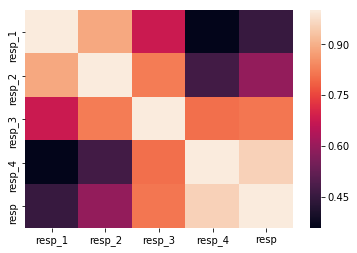

In [337]:
import seaborn as sns

sns.heatmap(train_data_[['resp_1','resp_2','resp_3','resp_4','resp']].corr())
plt.show()

### Features

In [12]:
features.head()

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
0,feature_0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,feature_1,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,feature_2,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,feature_3,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,feature_4,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [13]:
features = features.set_index('feature')

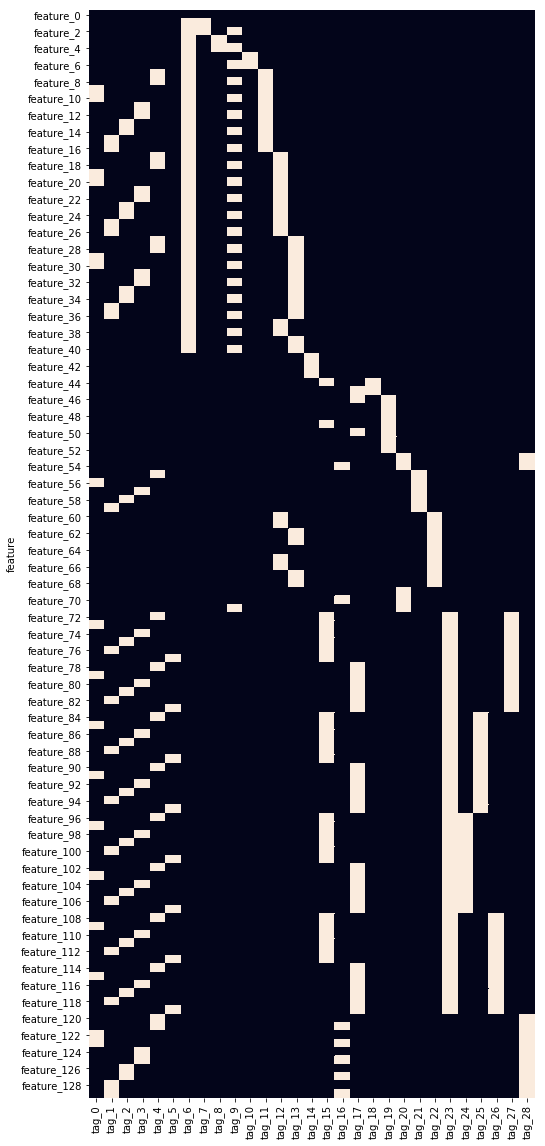

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,20))     
sns.heatmap(features*1,cbar=False)
plt.show()

### Feature Histograms

C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


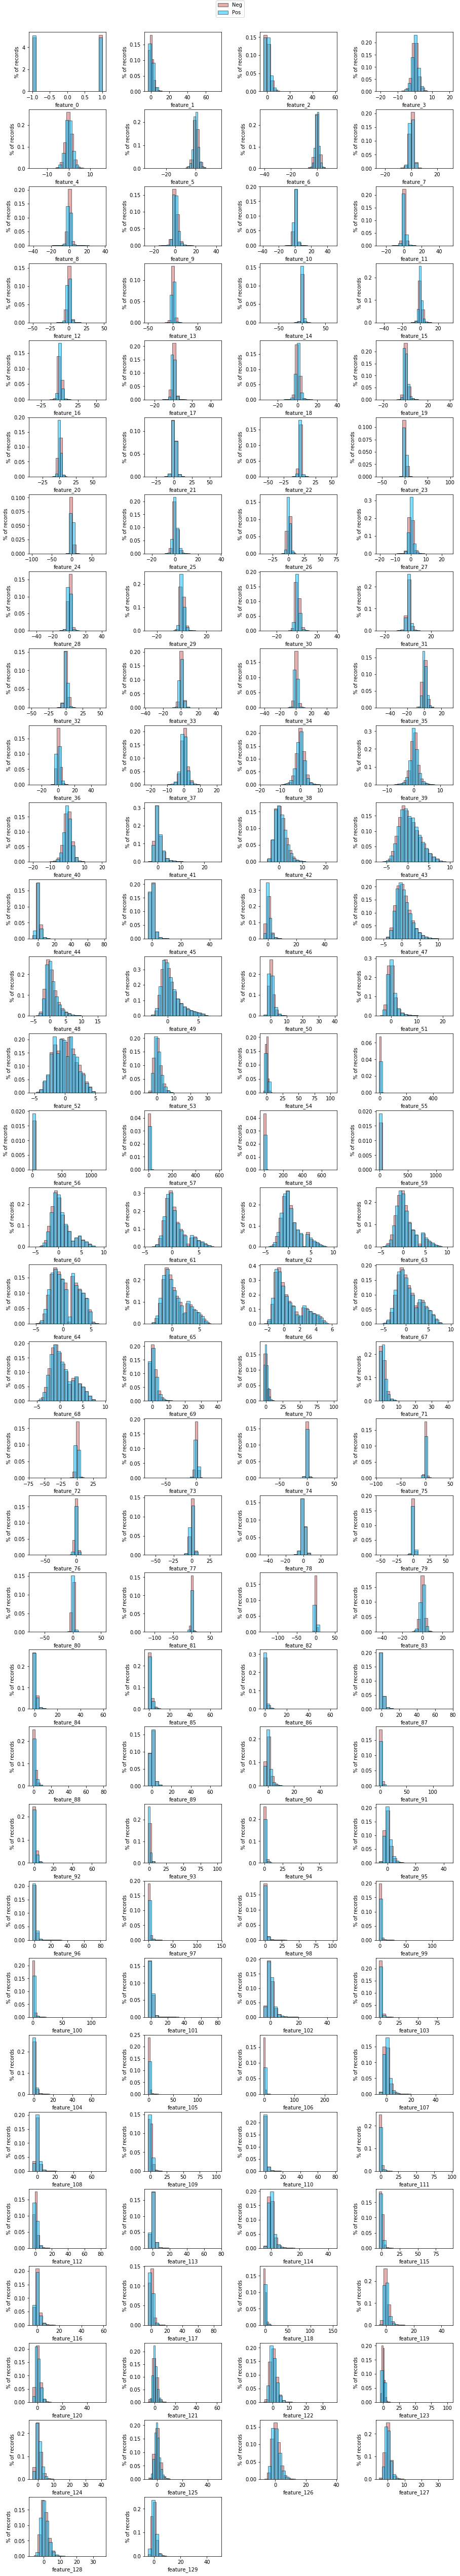

In [118]:
train_data_pos = train_data_[train_data_['resp']>0].iloc[:,7:-2]
train_data_neg = train_data_[train_data_['resp']<0].iloc[:,7:-2]

# set up figure
fig = plt.figure(figsize=(15,80))
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.3)

# plot histogram for each features
for i,feature in enumerate(train_data_.iloc[:,7:-2].columns.values):
    ax = fig.add_subplot(33,4,i+1)
    
    pos_feature = train_data_pos[feature].values
    neg_feature = train_data_neg[feature].values
    
    ax.hist(neg_feature,alpha=0.5,bins=20,color='indianred',edgecolor='black',density=True,label='Neg')
    ax.hist(pos_feature,alpha=0.5,bins=20,color='deepskyblue',edgecolor='black',density=True,label='Pos')

    ax.set_xlabel(feature)
    ax.set_ylabel('% of records')   

# Add legend
h, l = ax.get_legend_handles_labels()
fig.legend(h, l, loc="upper center",borderaxespad=0.1)
    
plt.subplots_adjust(top=0.99)
plt.show()

### Outliers

In [346]:
def outlier_detector(x, k=1.5):
    #Find outliers using Tukey's fences method
    Q1 = np.nanquantile(x,0.25)
    Q3 = np.nanquantile(x,0.75)
    outliers = list(x[x<Q1-k*(Q3-Q1)].index.values)
    outliers = outliers + list(x[x>Q3+k*(Q3-Q1)].index.values)
    return outliers

In [361]:
pct_outliers = []
for feature in train_data_.iloc[:,7:-2].columns.values:
    n_outliers = len(outlier_detector(train_data_[feature],k=2.5))/len(train_data_[feature])*100
    pct_outliers.append(n_outliers)
pct_outliers = pd.DataFrame(pct_outliers, index=train_data_.iloc[:,7:-2].columns.values)

In [362]:
pct_outliers.sort_values(by=0,ascending=False)

,0
feature_56,4.083749
feature_74,4.077720
feature_86,4.002966
feature_110,3.997540
feature_111,3.540575
...,...
feature_65,0.000000
feature_64,0.000000
feature_52,0.000000
feature_43,0.000000


In [363]:
#Find records with outliers on any feature
outliers = []
for feature in train_data_.iloc[:,7:-2].columns.values:
    outliers = outliers + outlier_detector(train_data_[feature],k=2.5)
outliers = list(set(outliers))

In [364]:
train_data_clean = train_data_.loc[~train_data_.index.isin(outliers)]

In [365]:
len(train_data_clean)/len(train_data_)

0.6854958794769619

Re-plot histograms after removing outliers

C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Alex\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


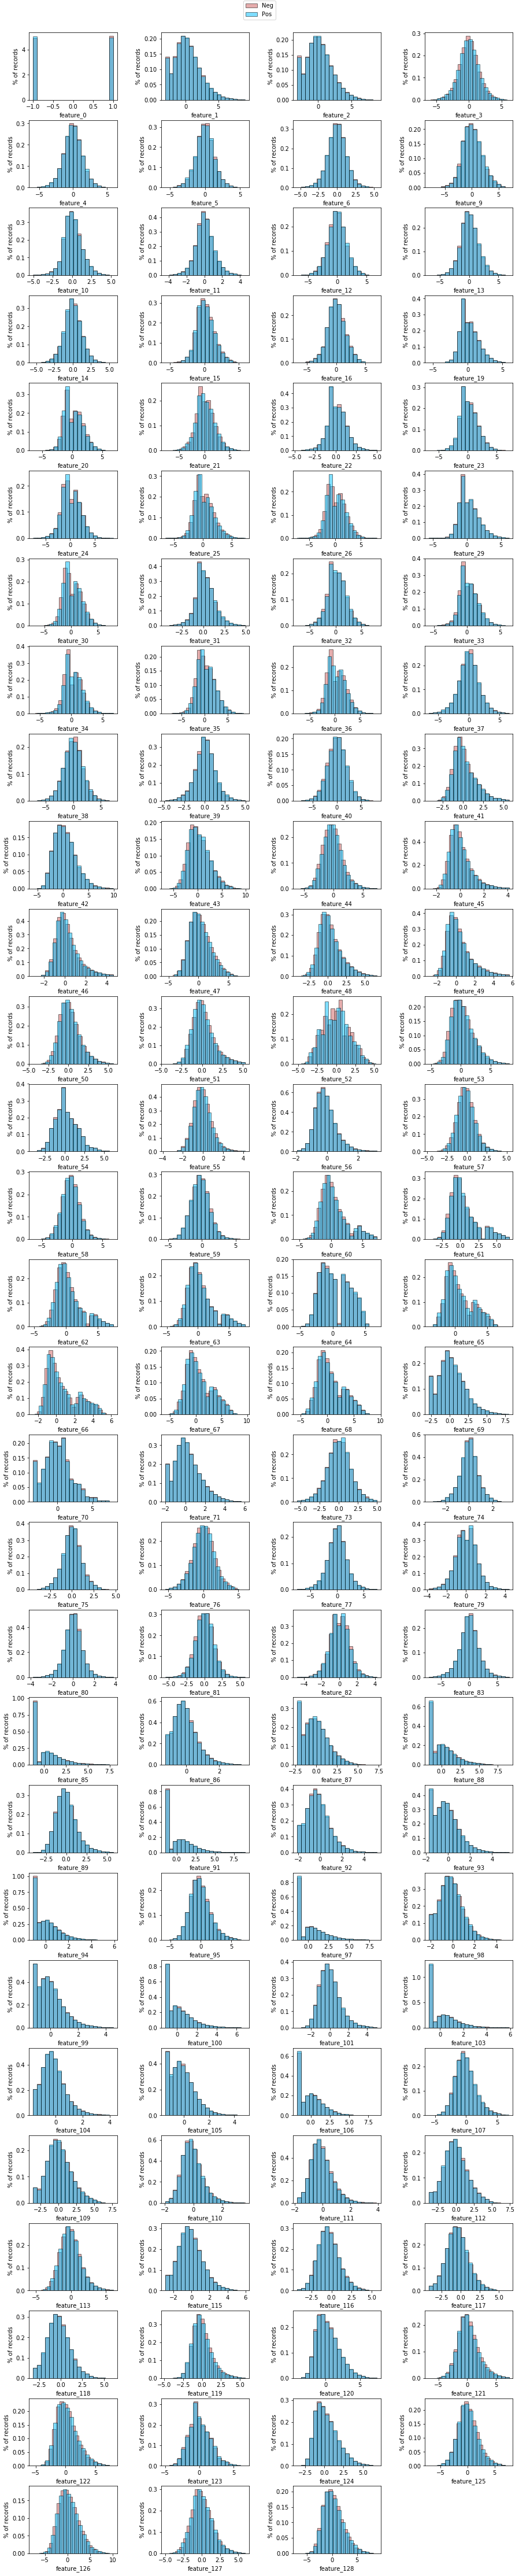

In [368]:
train_data_pos = train_data_clean[train_data_clean['resp']>0].iloc[:,7:-2]
train_data_neg = train_data_clean[train_data_clean['resp']<0].iloc[:,7:-2]

# set up figure
fig = plt.figure(figsize=(15,70))
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.3)

# plot histogram for each features
for i,feature in enumerate(train_data_clean.iloc[:,7:-2].columns.values):
    ax = fig.add_subplot(29,4,i+1)
    
    pos_feature = train_data_pos[feature].values
    neg_feature = train_data_neg[feature].values
    
    ax.hist(neg_feature,alpha=0.5,bins=20,color='indianred',edgecolor='black',density=True,label='Neg')
    ax.hist(pos_feature,alpha=0.5,bins=20,color='deepskyblue',edgecolor='black',density=True,label='Pos')

    ax.set_xlabel(feature)
    ax.set_ylabel('% of records')   

# Add legend
h, l = ax.get_legend_handles_labels()
fig.legend(h, l, loc="upper center",borderaxespad=0.1)
    
plt.subplots_adjust(top=0.99)
plt.show()